In [5]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot erstellen
def pairplot_fct(resultsDF, compression_ratio, output_folder):
    result_df = resultsDF[resultsDF['compression_ratio'] == compression_ratio]
    pairplot = sns.pairplot(result_df, x_vars=['numDense', 'numConvLayer', 'numConv'], y_vars=['best_val_si_snr', 'best_train_si_snr', 'delta_si_snr'], kind='reg', height=2)
    pairplot.fig.suptitle(f'compression_ratio = {compression_ratio:.1}', y=1.05)
    plt.tight_layout()
    plt.savefig(f"{output_folder}hyperparam_c={compression_ratio:.1f}.pdf", bbox_inches='tight')
    plt.show()

def hyperparameter_Plot(data, output_folder, pdfname):
    # JSON in ein pandas DataFrame konvertieren
    resultsDF = pd.DataFrame(data)

    # Delta Accuracy berechnen
    resultsDF['delta_si_snr'] = (resultsDF['best_train_si_snr'] - resultsDF['best_val_si_snr']) / resultsDF['best_val_si_snr']
    resultsDF.loc[resultsDF['numConvLayer'] == 0, 'numConv'] = 0

    all_compression_ratios = resultsDF['compression_ratio'].unique().tolist()
    if len(all_compression_ratios) > 1:
        for ratio in all_compression_ratios:
            pairplot_fct(resultsDF, ratio, output_folder)

        pairplot = sns.pairplot(resultsDF, x_vars=['numDense', 'numConvLayer', 'numConv'], y_vars=['best_val_si_snr', 'best_train_si_snr', 'delta_si_snr'], kind='reg', height=2)
        pairplot.fig.suptitle(f'all compression_ratios', y=1.05)
    else:
        pairplot = sns.pairplot(resultsDF, x_vars=['numDense', 'numConvLayer', 'numConv'], y_vars=['best_val_si_snr', 'best_train_si_snr', 'delta_si_snr'], kind='reg', height=2)
        pairplot.fig.suptitle(f'compression_ratio = {all_compression_ratios[0]:.1}', y=1.05)

    # plt.tight_layout()
    plt.savefig(f"{output_folder}Hyperparam_all_{pdfname}.pdf", bbox_inches='tight')
    plt.show()

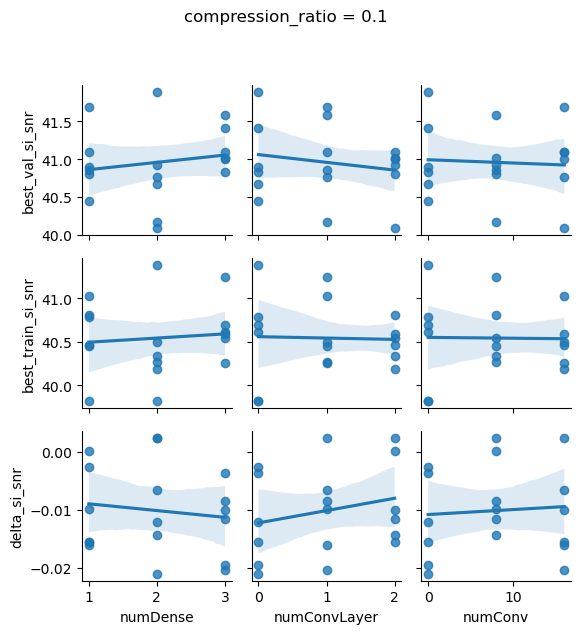

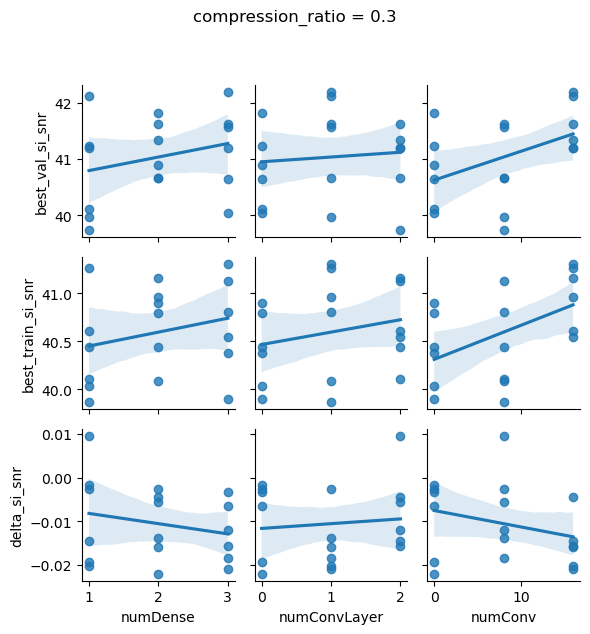

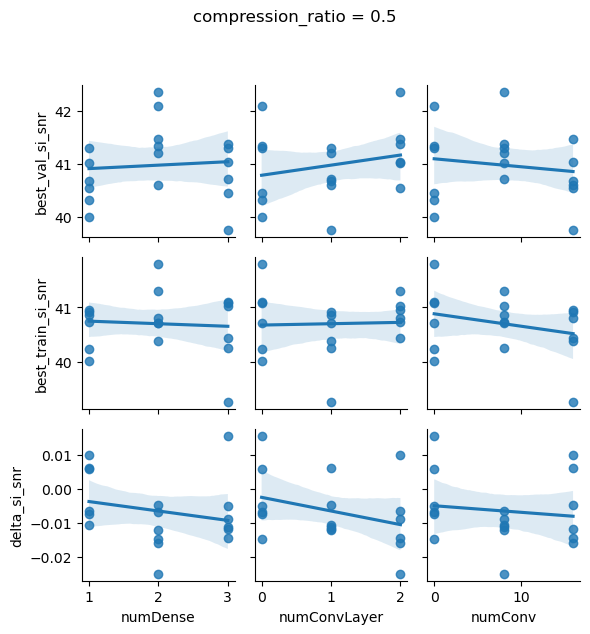

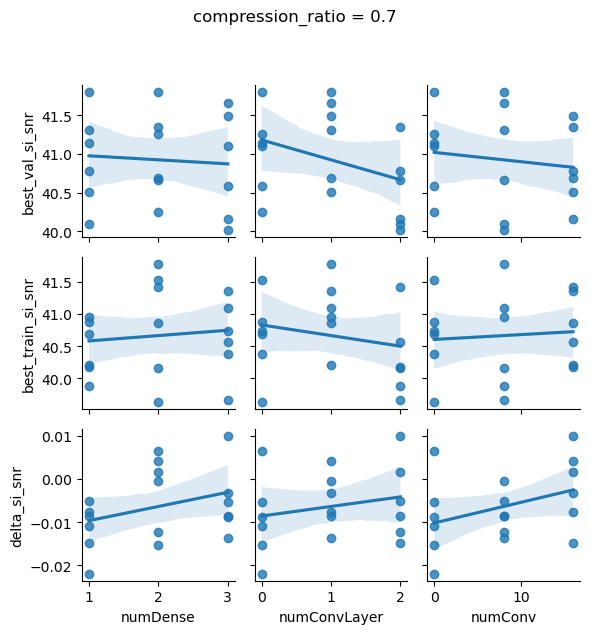

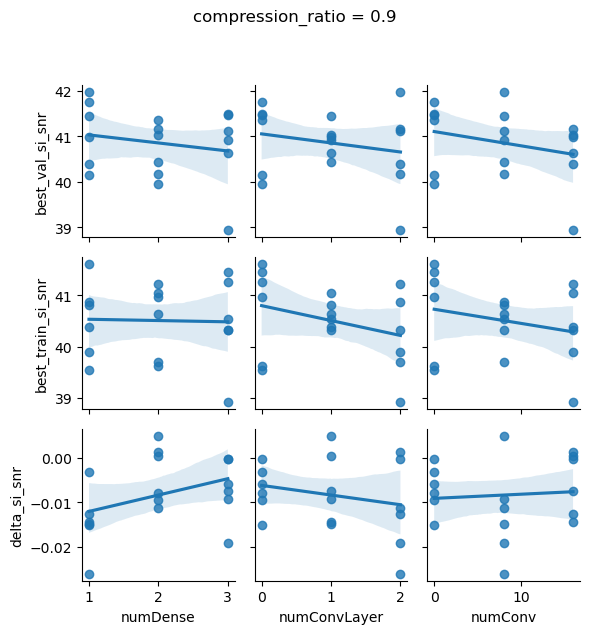

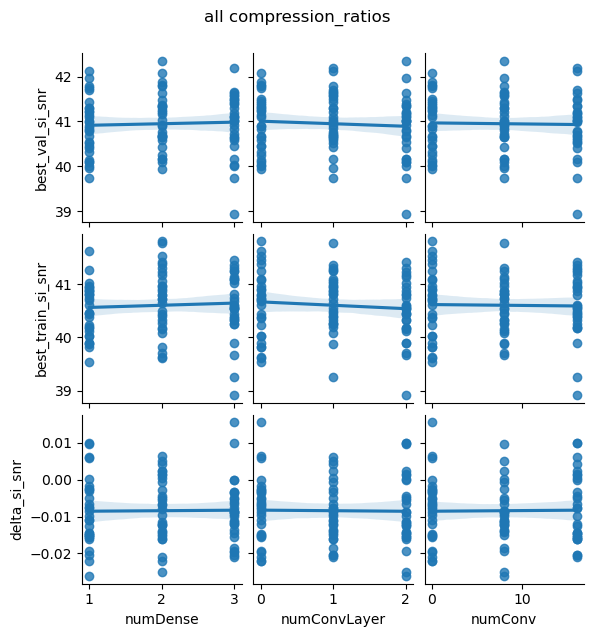

In [6]:
def main():
    Versuch_folder = 'output/Versuch3_13.07.2023/hyperparamsearch'
    Versuch_folder = 'output/Versuch1_11.07.2023/'
    json_file = 'searchResults2_layers.json'
    json_file = 'searchResults3_1_96_layer=[2,3].json'
    json_file = 'searchResults1.json'
    json_file = 'searchResults.json'
    # json_file = 'outputpdf/erster/searchResults.json'

    # JSON-Daten laden
    with open(Versuch_folder + 'hyperparamsearch/' + json_file) as json_file_obj:
        data = json.load(json_file_obj)
    # print(json_file)
    hyperparameter_Plot(data, Versuch_folder, json_file)

if __name__ == "__main__":
   # stuff only to run when not called via 'import' here
   main()


In [3]:
save_period = 1
for i in range (10):
    if (i % save_period == 0) and (i != 0):
       print('t', i)

t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9


In [4]:
import numpy as np
np.linspace(32,64,5), np.linspace(64,128,5) 
[288+32, 288+64, 288+96, 288+128, 416+32, 416+64, 480+32]

[320, 352, 384, 416, 448, 480, 512]